 Kevin Galvan Serrano 014687114

# Business Understanding
The purpose of this analysis is to examine the relationship between sales price, total basement square feet, and overall quality using cluster analysis. A better understanding of this process has the potential of leading to more sales, by analyzing any trends between the variables



# Data Analysis Technique

*   Cluster Analysis 
*   Sale Price, OverallQual, TotalBsmtSF 
*   YearBuilt




# Data Understanding and Exploratory Data Analysis (EDA)

In [132]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")

In [133]:
# loading data set
real_estate=pd.read_excel("/content/real_estate.xlsx")
real_estate.head()

,LotArea,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,TotalBsmtSF,Heating,CentralAir,FullBath,HalfBath,Bedrooms,KitchenQual,GarageCars,PoolArea,YrSold,SalePrice
0,8450,1Fam,2Story,7,2003,2003,Gable,856,GasA,Y,2,1,3,Gd,2,0,2008,208500
1,9600,1Fam,1Story,6,1976,1976,Gable,1262,GasA,Y,2,0,3,TA,2,0,2007,181500
2,11250,1Fam,2Story,7,2001,2002,Gable,920,GasA,Y,2,1,3,Gd,2,0,2008,223500
3,9550,1Fam,2Story,7,1915,1970,Gable,756,GasA,Y,1,0,3,Gd,3,0,2006,140000
4,14260,1Fam,2Story,8,2000,2000,Gable,1145,GasA,Y,2,1,4,Gd,3,0,2008,250000


In [134]:
# how many rows and columns
real_estate.shape

(1460, 18)

In [135]:
# check data types
real_estate.dtypes

LotArea          int64
BldgType        object
HouseStyle      object
OverallQual      int64
YearBuilt        int64
YearRemodAdd     int64
RoofStyle       object
TotalBsmtSF      int64
Heating         object
CentralAir      object
FullBath         int64
HalfBath         int64
Bedrooms         int64
KitchenQual     object
GarageCars       int64
PoolArea         int64
YrSold           int64
SalePrice        int64
dtype: object

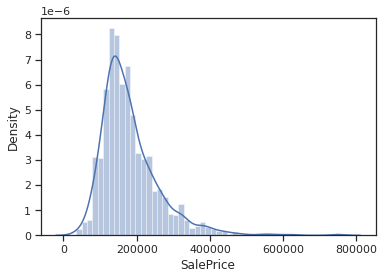

In [136]:
# looking at distribution chart
sns.distplot(real_estate['SalePrice'].dropna())

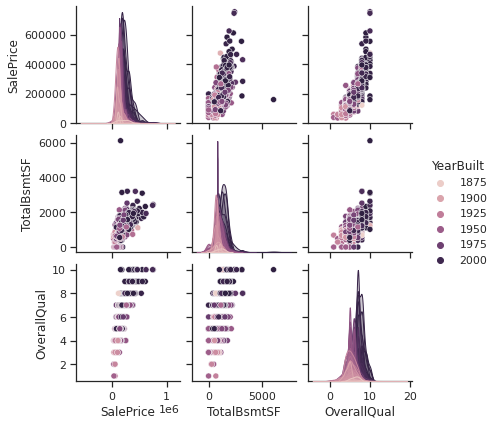

In [137]:
# looking at multivariate analysis of data
sns.set(style="ticks", color_codes=True)
sns.pairplot(real_estate,height=2,vars = [ 'SalePrice','TotalBsmtSF','OverallQual'], hue="YearBuilt")
plt.show()

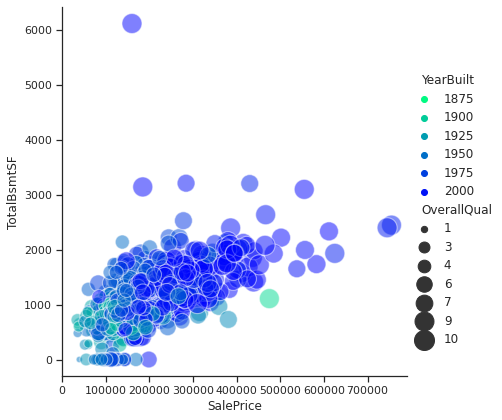

In [138]:
# looking at scatter plots
sns.relplot(x="SalePrice", y="TotalBsmtSF", hue="YearBuilt", size="OverallQual",
            sizes=(40, 400), alpha=.5, palette="winter_r",
            height=6, data=real_estate)

# Data Preprocessing 

In [139]:
# checking for missing values
missing = real_estate.isnull().sum().sort_values(ascending=False)
missing

LotArea         0
BldgType        0
YrSold          0
PoolArea        0
GarageCars      0
KitchenQual     0
Bedrooms        0
HalfBath        0
FullBath        0
CentralAir      0
Heating         0
TotalBsmtSF     0
RoofStyle       0
YearRemodAdd    0
YearBuilt       0
OverallQual     0
HouseStyle      0
SalePrice       0
dtype: int64

In [140]:
# checking for null values
real_estate.notnull().sum()

LotArea         1460
BldgType        1460
HouseStyle      1460
OverallQual     1460
YearBuilt       1460
YearRemodAdd    1460
RoofStyle       1460
TotalBsmtSF     1460
Heating         1460
CentralAir      1460
FullBath        1460
HalfBath        1460
Bedrooms        1460
KitchenQual     1460
GarageCars      1460
PoolArea        1460
YrSold          1460
SalePrice       1460
dtype: int64

In [141]:
real_estate.isnull().sum()

LotArea         0
BldgType        0
HouseStyle      0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
TotalBsmtSF     0
Heating         0
CentralAir      0
FullBath        0
HalfBath        0
Bedrooms        0
KitchenQual     0
GarageCars      0
PoolArea        0
YrSold          0
SalePrice       0
dtype: int64

In [142]:
real_estate.head().style.highlight_max(color='lightgreen', axis=0)

,LotArea,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,TotalBsmtSF,Heating,CentralAir,FullBath,HalfBath,Bedrooms,KitchenQual,GarageCars,PoolArea,YrSold,SalePrice
0,8450,1Fam,2Story,7,2003,2003,Gable,856,GasA,Y,2,1,3,Gd,2,0,2008,208500
1,9600,1Fam,1Story,6,1976,1976,Gable,1262,GasA,Y,2,0,3,TA,2,0,2007,181500
2,11250,1Fam,2Story,7,2001,2002,Gable,920,GasA,Y,2,1,3,Gd,2,0,2008,223500
3,9550,1Fam,2Story,7,1915,1970,Gable,756,GasA,Y,1,0,3,Gd,3,0,2006,140000
4,14260,1Fam,2Story,8,2000,2000,Gable,1145,GasA,Y,2,1,4,Gd,3,0,2008,250000


# Data Analysis

In [143]:
re_clustered = real_estate[['SalePrice', 'TotalBsmtSF', 'OverallQual']]

In [144]:
# showing scaled dataset values
scaler = StandardScaler()
re_clustered_scaled = scaler.fit_transform(re_clustered)
re_clustered_scaled

array([[ 0.34727322, -0.45930254,  0.65147924],
       [ 0.00728832,  0.46646492, -0.07183611],
       [ 0.53615372, -0.31336875,  0.65147924],
       ...,
       [ 1.07761115,  0.21564122,  0.65147924],
       [-0.48852299,  0.04690528, -0.79515147],
       [-0.42084081,  0.45278362, -0.79515147]])

In [145]:
# looking at scaled dataset shape
re_clustered_scaled.shape

(1460, 3)

In [146]:
km = KMeans(n_clusters=3, random_state=0)
clusters = km.fit_predict(re_clustered_scaled)

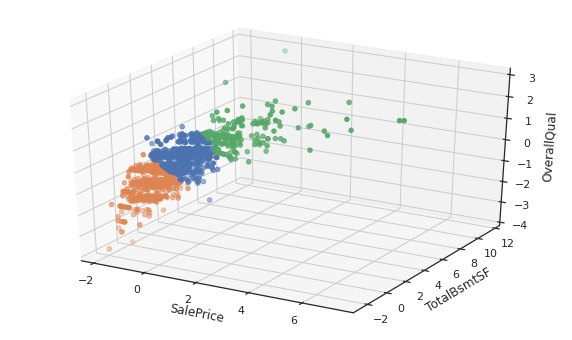

In [147]:
# drawing 3D plot of clusters
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('SalePrice')
ax.set_ylabel('TotalBsmtSF')
ax.set_zlabel('OverallQual')

for i in range(4):
    ax.scatter(re_clustered_scaled[clusters ==i,0], re_clustered_scaled[clusters ==i,1], re_clustered_scaled[clusters ==i,2])

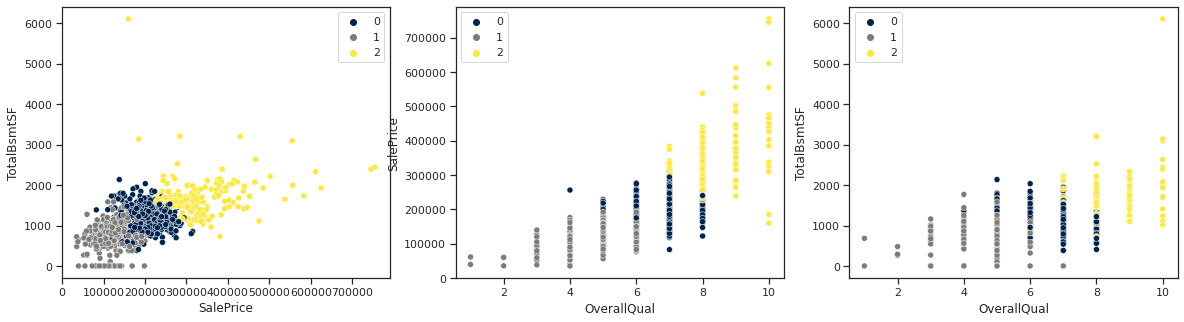

In [148]:
# drawing bi-variate scatter plots
fig, ax  = plt.subplots(1,3,figsize=(20,5))
sns.scatterplot(real_estate['SalePrice'], real_estate['TotalBsmtSF'], hue=clusters, ax=ax[0], palette='cividis');
sns.scatterplot(real_estate['OverallQual'], real_estate['SalePrice'], hue=clusters, ax=ax[1], palette='cividis');
sns.scatterplot(real_estate['OverallQual'], real_estate['TotalBsmtSF'], hue=clusters, ax=ax[2], palette='cividis');

In [149]:
# showing head of re_clustered
re_clustered.head()

,SalePrice,TotalBsmtSF,OverallQual
0,208500,856,7
1,181500,1262,6
2,223500,920,7
3,140000,756,7
4,250000,1145,8


In [150]:
# creating clusters
re_clustered['cluster'] = clusters
re_clustered.head()

,SalePrice,TotalBsmtSF,OverallQual,cluster
0,208500,856,7,0
1,181500,1262,6,0
2,223500,920,7,0
3,140000,756,7,0
4,250000,1145,8,0


In [151]:
# finding mean of clusters
re_clustered.groupby('cluster').mean()

,SalePrice,TotalBsmtSF,OverallQual
cluster,,,
0,195637.176672,1137.840480,6.660377
1,126974.767103,810.023290,5.018923
2,330825.300000,1705.263158,8.284211


# Quality of the Model 

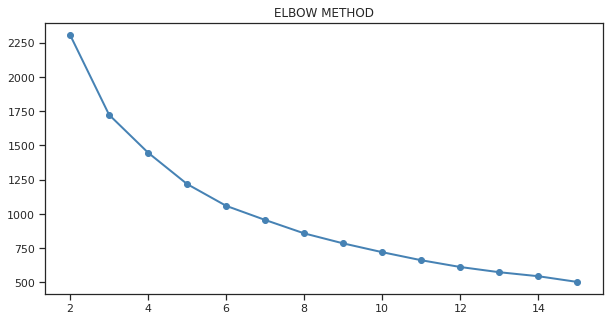

In [152]:
# elbow method to determine quality
inertias = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(re_clustered_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('ELBOW METHOD')
plt.plot(np.arange(2,16),inertias, marker='o', lw=2, color='steelblue');

Using the elbow method, we can see that the optimal number of clusters is 3 to 4 clusters. Using any more clusters might result in inertia not dcreasing drastically and not adding any value.

# Conclusion & Recommendations

The purpose of this project was to develop a cluster analysis of the real estate dataset by observing the relationships between Sale Price, Total Basement SF, and Overall Quality. We looked at several scatter plots to visualize relationships between the three variables and a dependent variable based on Year Built. Management can use this information to make the best decisions by looking at the relationship between sales price and basement square footage, year built, and the overall quality of the house. We can see that houses that with lower overall quality often scale with sales price. Additionally, basement square footage also scaled with sales price. We can use this information to determine the price of a house based on these factors